# Installation

In [2]:
!git clone https://github.com/TheShenk/hai-nonconflict-action-learning.git

Cloning into 'hai-nonconflict-action-learning'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 83 (delta 25), reused 43 (delta 17), pack-reused 30
Unpacking objects: 100% (83/83), done.


In [1]:
%cd hai-nonconflict-action-learning/

/content/hai-nonconflict-action-learning


In [2]:
!pip install stable-baselines3[extra] pymunk pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [1]:
import gym
import gym_futbol
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback

import utils
from multiagent import MultiAgentOnPolicyProxy, multiagent_learn, MultiAgentOffPolicyProxy
from IPython import display

pygame 2.1.0 (SDL 2.0.16, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
%load_ext tensorboard

# Basics

Reset


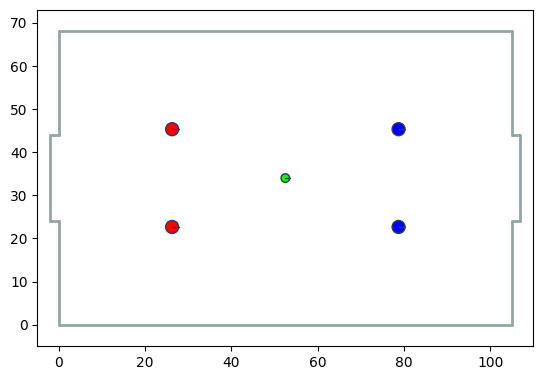

In [2]:
env = gym.make("Futbol2v2-v1")
env.render()

In [5]:
env.action_space

MultiDiscrete([5 5 5 5])

In [6]:
from stable_baselines3.common.env_checker import check_env
check_env(env)

# Learning model

In [2]:
log_dir = "logs/"
timesteps = 50000

In [3]:
from stable_baselines3.common.env_util import make_vec_env

env = gym.make("Futbol2v2-v1")
env = make_vec_env(lambda: env, n_envs=4, monitor_dir=log_dir)
model = PPO("MlpPolicy", env, device='cpu')
model.learn(timesteps)
model.save("models/footbol2v2-ppo")

# Display model statistic

     index            r   l          t
0        0   155.344302  75   0.836995
1        1    37.251805  75   1.236683
2        2   246.193750  75   1.547551
3        3 -1014.314991  75   1.856825
4        4   295.685775  75   2.164369
..     ...          ...  ..        ...
161    161  1597.695812  75  57.009118
162    162   -56.477502  75  57.346870
163    163  2567.793982  75  57.695286
164    164   363.661477  75  58.012881
165    165   113.101150  75  58.335833

[166 rows x 4 columns]


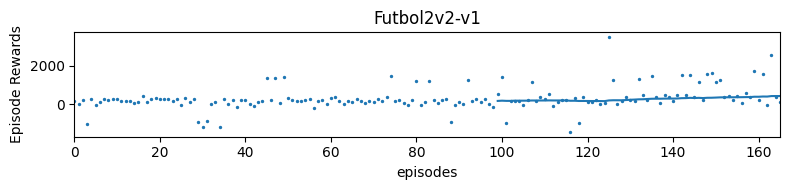

In [4]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

log_data = results_plotter.load_results(log_dir)
print(log_data)

# Load model from file

In [12]:
model = PPO.load("models/footbol2v2-ppo", device="cpu")

# Run models

## Pygame
Run game with model in new windows with pygame

In [13]:
RES = WIDTH, HEIGHT = 600, 400
FPS = 60

env = gym.make("Futbol2v2-v1")
visualizer = utils.PygameVisualizer(env, RES, FPS)
visualizer.run(model)

env.close()
visualizer.close()

## Matplotlib
Run model in notebook with matplotlib

KeyboardInterrupt: 

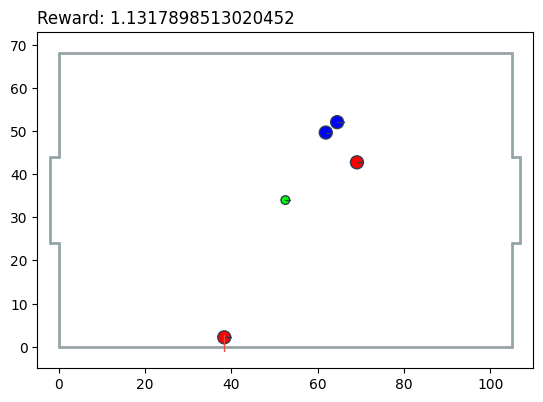

In [25]:
env = gym.make("Futbol2v2-v1")

visualizer = utils.MatplotlibVisualizer(env)
visualizer.run(model)

env.close()

# MultiAgent

## Learn

In [5]:
log_dir = "logs/futbol/ppo"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=1, monitor_dir=log_dir)

models = [
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             utils.TransformAction(env, gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
                             device='cpu')),
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             utils.TransformAction(env, gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
                             device='cpu'))
]

timesteps = 50000

### Rewrote learning cycle
StableBaselines3 не поддерживает одновременное обучение нескольких агентов, это даже не ошибка по мнению разработчиков. Они считают, что в данном случае каждому пользователю необходимо самостоятельо переопределить цикл обучения (для не мультиагентных задач используется метод learn). Здесь представлен код, взятый из исходных кодов StableBaselines3, но адаптированный для многоагентных задач.
В обычной ситуации, learn сам взаимодействует со средой. Но при существовании нескольких агентов нужно получить действие от каждого и только потом передавать их в среду. Именно это здесь и реализовано. Каждому агенту передается наблюдение от среды (в данной задаче оно одинаково для всех) и получается действие. Затем действия объеядиняются и передаются среде. Затем каждый агент обновляется с учетом полученных данных (метод record).
Весь код, взятый из StableBaselines3 вынесен в класс MultiAgentModelProxy.

In [6]:
#TODO: рассмотреть возможность асинхронной среды
#TODO: добавить вывод логов для последующего использования tensorboard

In [7]:
multiagent_learn(models, timesteps, env, "models/footbol/ppo")

/tmp/ipykernel_6364/566115823.py:1: DeprecationWarning: Parameters `eval_env` and `eval_freq` are deprecated and will be removed in the future. Please use `EvalCallback` or a custom Callback instead.
  multiagent_learn(models, timesteps, env, "models/footbol/ppo")


2048 [3326.1494]
4096 [2343.977]
6144 [6089.742]
8192 [3482.7146]
10240 [4693.9946]
12288 [2733.1423]
14336 [6659.071]
16384 [6916.577]
18432 [7119.138]
20480 [3413.466]
22528 [7390.3765]
24576 [3820.3098]
26624 [4656.6743]
28672 [7303.35]
30720 [5957.359]
32768 [6850.183]
34816 [5931.638]
36864 [2588.1387]
38912 [3754.411]
40960 [5280.109]
43008 [5509.2446]
45056 [5123.45]
47104 [6511.9985]
49152 [42.87065]
51200 [7209.228]


## Statistic

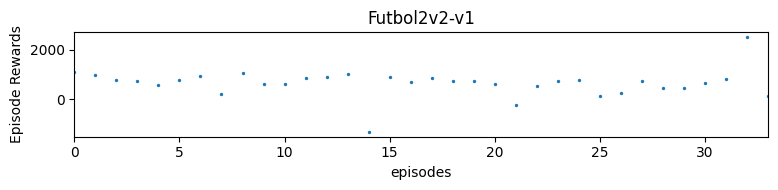

In [5]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## Load and visualise

In [23]:
from stable_baselines3 import PPO

models = [PPO.load(f"models/footbol/ppo-best-{index}", device="cpu") for index in range(2)]

KeyboardInterrupt: 

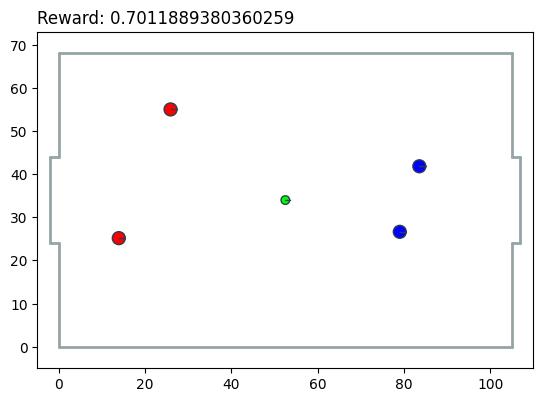

In [4]:
env = gym.make("Futbol2v2-v1", action_space_type="box")

multi_agent = utils.MultiModelAgent(models)

visualizer = utils.MatplotlibVisualizer(env)
visualizer.run(multi_agent)

env.close()

In [26]:
RES = WIDTH, HEIGHT = 600, 400
FPS = 60

env = gym.make("Futbol2v2-v1", action_space_type="discrete")
multi_agent = utils.MultiModelAgent(models)

visualizer = utils.PygameVisualizer(env, RES, FPS)
visualizer.run(multi_agent)

env.close()
visualizer.close()

ValueError: zero-dimensional arrays cannot be concatenated

# Algorithms comparison

In [6]:
timesteps = 1000000

In [3]:
from stable_baselines3.common.callbacks import EvalCallback

eval_env = gym.make('Futbol2v2-v1')
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env, best_model_save_path='./models/footbol/centralized/', eval_freq=500,
                             deterministic=True, render=False)

## PPO (Centralized & Box)

In [6]:
ALGORITHM_NAME="ppo-centralized-box"
log_dir = f"logs/futbol/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1",
                                    action_space_type="box"), n_envs=4, monitor_dir=log_dir)
model = PPO("MlpPolicy", env, verbose=1, device="cpu")

Using cpu device


In [ ]:
model.learn(timesteps)

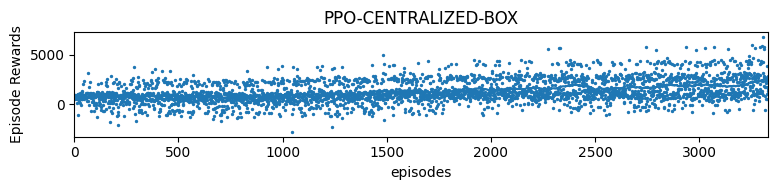

In [7]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## PPO (Centralized & Multi-Discrete)

In [8]:
ALGORITHM_NAME="ppo-centralized-multi-discrete"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1",
                                    action_space_type="multi-discrete"), n_envs=4, monitor_dir=log_dir)
model = PPO("MlpPolicy", env, verbose=1, device="cpu")

Using cpu device


In [ ]:
model.learn(300000, callback=eval_callback)

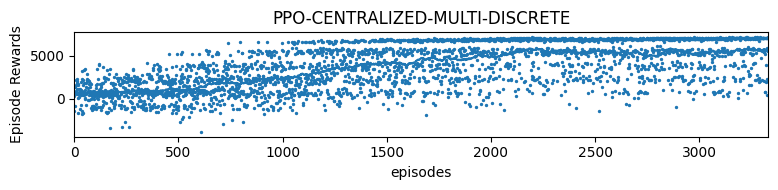

In [9]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## PPO (Concurrent & Box)

In [39]:
log_dir = "logs/futbol/ppo"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1",
                                    action_space_type="box"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
    n_envs=4
)

models = [
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu')),
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu'))
]

In [ ]:
multiagent_learn(models, timesteps, env, "models/footbol/ppo")

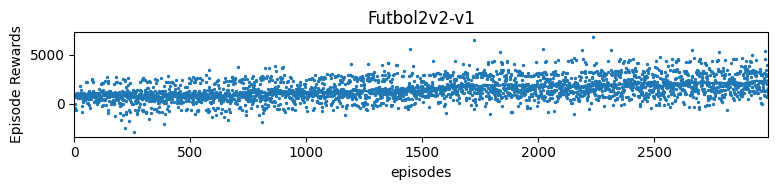

In [41]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## PPO (Concurrent & Multi-Discrete)
Отличительной особенностью PPO является поддержка пространств действий разного вида.
Здесь при использовании Box политика возвращает (направление движения по X, направление движения по Y, направление удара по мячу по X, направление удара по мячу по Y). При этом направление удара имеет смысл только тогда, когда игрок касается мяча.
При использовании Multi-Discrete: Два числа. Первое - направление (0 - стоять на месте, 1,2,3,4 - право, лево, ...). Второе число - действие (0 и 1 - движение вперед по указанному направлению, 2 - удар в направление ворот, 3 - движение по направлению к мячу, 4 - пасс другому игроку)
При использовании Discrete: число от 0 до 24, которое преобразуется в Multi-Discrete как (x//25, x%5)

In [16]:
ALGORITHM_NAME="ppo-multi-discrete"
log_dir = f"logs/futbol/{ALGORITHM_NAME}"

env = make_vec_env(lambda: gym.make("Futbol2v2-v1",
                                    action_space_type="multi-discrete"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.MultiDiscrete([5, 5])),
    n_envs=4
)

models = [
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu')),
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu'))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}",
                 action_combiner=lambda acts: np.concatenate(acts, axis=1))

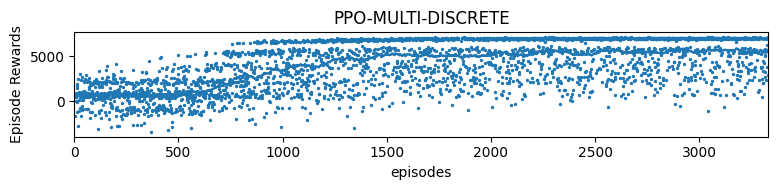

In [18]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## PPO (Concurrent & Discrete)

In [23]:
ALGORITHM_NAME="ppo-discrete"
log_dir = f"logs/futbol/{ALGORITHM_NAME}"

env = make_vec_env(lambda: gym.make("Futbol2v2-v1",
                                    action_space_type="discrete"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Discrete(25)),
    n_envs=4
)

models = [
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu')),
    MultiAgentOnPolicyProxy(PPO("MlpPolicy",
                             ma_action_env,
                             device='cpu'))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}",
                 action_combiner=lambda acts: np.array(acts).transpose())

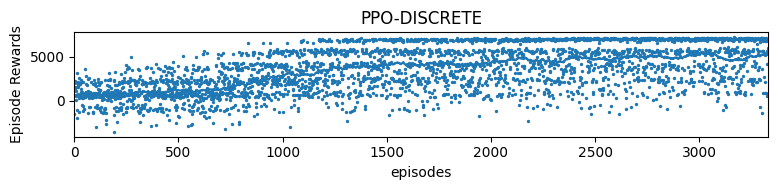

In [25]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## TD3

In [2]:
from stable_baselines3 import TD3

log_dir = "logs/futbol/td3"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
    n_envs=4
)

models = [
    MultiAgentOffPolicyProxy(TD3("MlpPolicy",
                             ma_action_env,
                             device='cpu', train_freq=(300, "step"))),
    MultiAgentOffPolicyProxy(TD3("MlpPolicy",
                             ma_action_env,
                             device='cpu', train_freq=(300, "step")))
]

In [ ]:
multiagent_learn(models, timesteps, env, "models/footbol/td3")

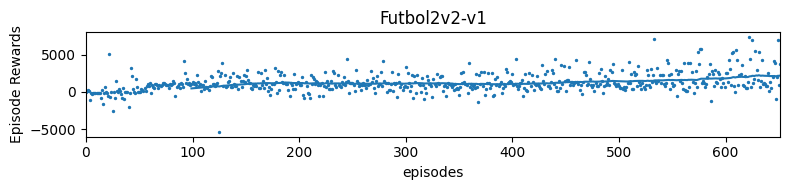

In [56]:
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## A2C

In [7]:
from stable_baselines3 import A2C
ALGORITHM_NAME="a2c"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
    n_envs=4
)

models = [
    MultiAgentOnPolicyProxy(A2C("MlpPolicy",
                             ma_action_env,
                             device='cpu')),
    MultiAgentOnPolicyProxy(A2C("MlpPolicy",
                             ma_action_env,
                             device='cpu'))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}")

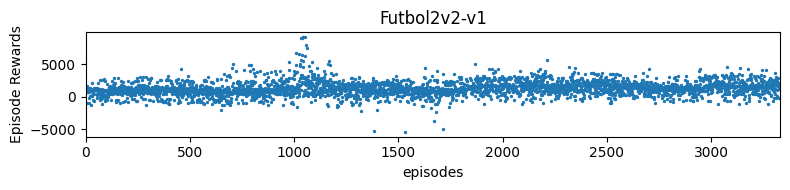

In [9]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## SAC

In [10]:
from stable_baselines3 import SAC
ALGORITHM_NAME="sac"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
    n_envs=4
)

models = [
    MultiAgentOffPolicyProxy(SAC("MlpPolicy",
                             ma_action_env,
                             device='cpu')),
    MultiAgentOffPolicyProxy(SAC("MlpPolicy",
                             ma_action_env,
                             device='cpu'))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}")

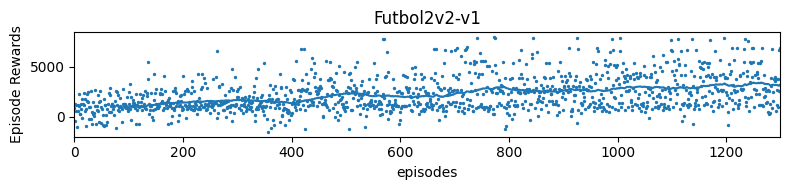

In [12]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, "Futbol2v2-v1")
display.display(plt.gcf())
display.clear_output(wait=True)

## DQN

In [4]:
from stable_baselines3 import DQN
ALGORITHM_NAME="dqn"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
tensorboard_log_dir = f"tensorboard/log/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="discrete"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Discrete(25)),
    n_envs=4
)

models = [
    MultiAgentOffPolicyProxy(DQN("MlpPolicy",
                             ma_action_env,
                             device='cpu', tensorboard_log=tensorboard_log_dir)),
    MultiAgentOffPolicyProxy(DQN("MlpPolicy",
                             ma_action_env,
                             device='cpu', tensorboard_log=tensorboard_log_dir))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}",
                 action_combiner=lambda acts: np.array(acts).transpose())

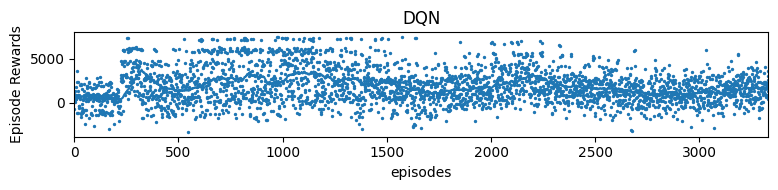

In [6]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## DDPG

In [13]:
from stable_baselines3 import DDPG
ALGORITHM_NAME="ddpg"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
env = make_vec_env(lambda: gym.make("Futbol2v2-v1", action_space_type="box"), n_envs=4, monitor_dir=log_dir)

env_iter = iter(env.envs)
ma_action_env = make_vec_env(
    lambda: utils.TransformAction(next(env_iter), gym.spaces.Box(low=-1.0, high=1.0, shape=(1, 4))),
    n_envs=4
)

models = [
    MultiAgentOffPolicyProxy(DDPG("MlpPolicy",
                             ma_action_env,
                             device='cpu', train_freq=(300, "step"))),
    MultiAgentOffPolicyProxy(DDPG("MlpPolicy",
                             ma_action_env,
                             device='cpu', train_freq=(300, "step")))
]

In [ ]:
multiagent_learn(models, timesteps, env, f"models/footbol/{ALGORITHM_NAME}",
                 action_combiner=lambda acts: np.array(acts).transpose())

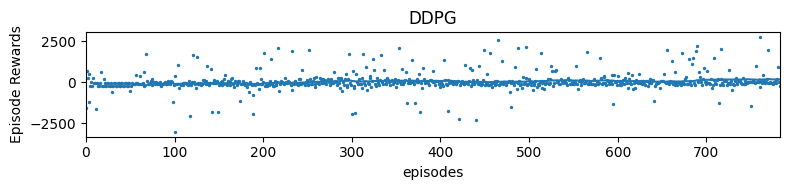

In [15]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

# Learning with hardcoded agent

In [5]:
from agents.simple_attacking_agent import SimpleAttackingAgent
from agents.simple_goalkeeper_agent import SimpleGoalkeeperAgent

timesteps = 1000000

## PPO (Centralized & Multi-Discrete)

In [6]:
ALGORITHM_NAME="ppo-centralized-multi-discrete-hca"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
tensorboard_log_dir = f"tensorboard/log/{ALGORITHM_NAME}"

eval_env = gym.make('Futbol2v2-v1', action_space_type=["multi-discrete", "box"])
eval_env.set_team_b_model(utils.MultiModelAgent([
                   SimpleAttackingAgent(eval_env,  0),
                   SimpleGoalkeeperAgent(eval_env, 1)
               ]))
eval_env = Monitor(eval_env)

def init_football_env():
    env = gym.make('Futbol2v2-v1', action_space_type=["multi-discrete", "box"])
    env.set_team_b_model(utils.MultiModelAgent([
        SimpleAttackingAgent(env,  0),
        SimpleGoalkeeperAgent(env, 1)
    ]))
    return env

env = make_vec_env(init_football_env, n_envs=4, monitor_dir=log_dir)

eval_callback = EvalCallback(eval_env, best_model_save_path=f'./models/footbol/{ALGORITHM_NAME}/', eval_freq=2400, render=False)

model = PPO("MlpPolicy", env, device="cpu", tensorboard_log=tensorboard_log_dir)

In [7]:
model.learn(total_timesteps=timesteps, callback=eval_callback)

Eval num_timesteps=9600, episode_reward=-7036.79 +/- 0.00
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=-5730.51 +/- 0.00
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=28800, episode_reward=-7527.11 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=-8106.78 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=48000, episode_reward=-7256.82 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=-7438.12 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=67200, episode_reward=-8043.67 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=76800, episode_reward=-7782.76 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=86400, episode_reward=-7854.97 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=96000, episode_reward=-8032.37 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=105600, episode_reward=-6780

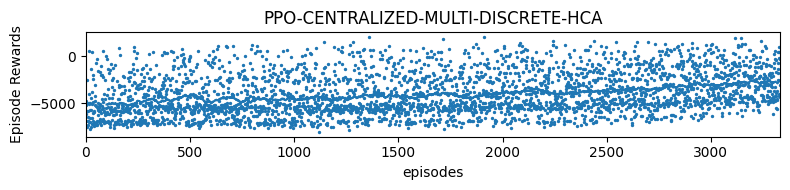

In [8]:
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## SAC (Centralized)

In [13]:
from stable_baselines3 import SAC
ALGORITHM_NAME="sac-centralized-hca"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
tensorboard_log_dir = f"tensorboard/log/{ALGORITHM_NAME}"

def init_football_env():
    env = gym.make('Futbol2v2-v1', action_space_type=["box", "box"])
    env.set_team_b_model(utils.MultiModelAgent([
        SimpleAttackingAgent(env,  0),
        SimpleGoalkeeperAgent(env, 1)
    ]))
    return env

eval_env = Monitor(init_football_env())
env = make_vec_env(init_football_env, n_envs=4, monitor_dir=log_dir)

eval_callback = EvalCallback(eval_env, best_model_save_path=f'./models/footbol/{ALGORITHM_NAME}/', eval_freq=2400, render=False)

model = SAC("MlpPolicy", env, device="cpu", tensorboard_log=tensorboard_log_dir)

In [14]:
model.learn(total_timesteps=timesteps, callback=eval_callback)

Eval num_timesteps=9600, episode_reward=-8169.48 +/- 0.00
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=-6508.03 +/- 0.00
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=28800, episode_reward=-7167.50 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=-5830.78 +/- 0.00
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=48000, episode_reward=-1596.14 +/- 1065.72
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=57600, episode_reward=-5399.78 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=67200, episode_reward=-523.16 +/- 1276.92
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=76800, episode_reward=-7095.19 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=86400, episode_reward=-6120.79 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=96000, episode_reward=-486.73 +/- 1895.35
Episod

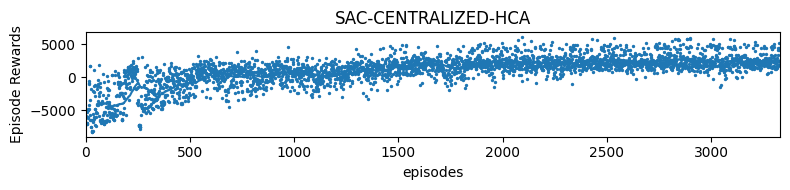

In [16]:
model.save(f'./models/footbol/{ALGORITHM_NAME}/last_model')
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)

## TD3 (Centralized)

In [31]:
from stable_baselines3 import TD3
ALGORITHM_NAME="td3-centralized-hca"

log_dir = f"logs/futbol/{ALGORITHM_NAME}"
tensorboard_log_dir = f"tensorboard/log/{ALGORITHM_NAME}"

def init_football_env():
    env = gym.make('Futbol2v2-v1', action_space_type=["box", "box"])
    env.set_team_b_model(utils.MultiModelAgent([
        SimpleAttackingAgent(env,  0),
        SimpleGoalkeeperAgent(env, 1)
    ]))
    return env

eval_env = Monitor(init_football_env())
env = make_vec_env(init_football_env, n_envs=4, monitor_dir=log_dir)

eval_callback = EvalCallback(eval_env, best_model_save_path=f'./models/footbol/{ALGORITHM_NAME}/', eval_freq=2400, render=False)

model = TD3("MlpPolicy", env, device="cpu", tensorboard_log=tensorboard_log_dir, train_freq=(10, "step"))

In [32]:
model.learn(total_timesteps=timesteps, callback=eval_callback)

Eval num_timesteps=9600, episode_reward=-1270.98 +/- 1157.40
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=-6831.46 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=28800, episode_reward=-3947.38 +/- 594.42
Episode length: 300.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=-6743.22 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=48000, episode_reward=-5120.19 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=-5372.71 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=67200, episode_reward=-5652.09 +/- 0.00
Episode length: 300.00 +/- 0.00
Eval num_timesteps=76800, episode_reward=-217.90 +/- 1193.19
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timesteps=86400, episode_reward=-291.22 +/- 585.19
Episode length: 300.00 +/- 0.00
Eval num_timesteps=96000, episode_reward=448.01 +/- 535.14
Episode length: 300.00 +/- 0.00
New best mean reward!
Eval num_timestep

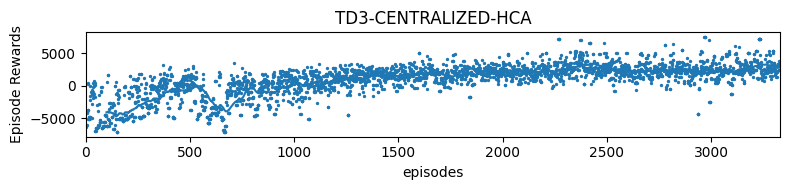

In [33]:
model.save(f'./models/footbol/{ALGORITHM_NAME}/last_model')
env.close()
results_plotter.plot_results([log_dir], timesteps, results_plotter.X_EPISODES, ALGORITHM_NAME.upper())
display.display(plt.gcf())
display.clear_output(wait=True)